In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm

# COGS 108 Final Project

### Research Question

Based on small area estimates for diabetes incidence in San Diego county, is there a higher risk of diabetes in areas that have limited accessibility to supermarkets?

### Hypothesis

We hypothesize that tracts that have less accessibility to supermarkets based on accessibility to sources of healthy food, individual level resources, and neighborhood-level indicators of resources will have a higher rate of diabetes across all ages, races, sexes, and poverty levels. We predict that populations with less accessibility to supermarkets will be at higher risk for diabetes development due to the decreased availability of fresh, healthy food options. 

### Datasets

**Food Access Research Atlas, San Diego**

- Link to the dataset: https://data.sandiegodata.org/dataset/usda-gov-food_access 
- Number of observations: 628

This data set that will be used is the San Diego Food Access Research Atlas. The Atlas uses census-level tract data to measure food access and presents spatial data about supermarket accessibility using the population count from the 2010 census. The data uses accessibility of healthy to healthy food sources, individual level resources, and neighborhood level indicators of resources as indicators of access. 


In [2]:
diabetes_df = pd.read_csv('sandiegodata.org-diabetes_sae-1/data/tract_diabetes.csv')

In [3]:
diabetes_df.head()

,geoid,asian,black,hisp,nhwhite,other,total
0,14000US06073000100,0.090034,NaN,0.240076,0.100720,0.149703,0.117236
1,14000US06073000201,0.083256,0.101111,0.093961,0.085595,0.094269,0.087723
2,14000US06073000202,0.084176,0.073590,0.096333,0.054982,0.084927,0.065198
3,14000US06073000300,0.045533,0.108271,0.086672,0.069047,0.025907,0.068951
4,14000US06073000400,0.048468,0.028781,0.045808,0.056943,0.049220,0.053447


**Small Area Estimates for Diabetes in San Diego**

- Link to the dataset: https://data.sandiegodata.org/dataset/sandiegodata-org-diabetes_sae 
- Number of observations: 628

This data set provides small area estimates of the diabetes rate per tract for all the tracts in San Diego county measured by CHIS microdata from 2015-2017 segmented by race, age, and group, and the race, age, sex, and poverty status of the population in San Diego county by tract measured by the ACS tract estimates from 2015-2017.

We plan to combine these datasets by the tract id number, which should match perfectly across them.

In [4]:
food_acc_df = pd.read_csv('usda.gov-food_access-1/data/sd_food_atlas.csv')

In [5]:
food_acc_df.head()

,geoid,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,...,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap
0,14000US06073000100,California,San Diego,1,3029,1333,0,0,0.000000,0,...,680,2813,26,76,2,15,97,239,52,9
1,14000US06073000201,California,San Diego,1,1801,992,0,0,0.000000,0,...,395,1588,30,84,0,12,87,182,151,20
2,14000US06073000202,California,San Diego,1,4208,2245,0,64,0.015209,0,...,556,3561,112,199,4,14,318,583,51,26
3,14000US06073000300,California,San Diego,1,4732,2871,0,179,0.037828,0,...,795,3880,118,303,22,31,378,687,332,62
4,14000US06073000400,California,San Diego,1,3669,2140,0,310,0.084492,0,...,350,2821,157,364,13,19,295,572,231,77


### Background and Prior Work

Diabetes, a medical condition in which an individual’s blood sugar levels are too high, affects millions of people all over the world. Although diabetes can be managed with diet and exercise, it is an incurable disease that comes with many health complications and high risks [1]. It is especially relevant to modern medicine because diabetes rates in the United States have nearly quadrupled over the past thirty years, and over 30 million Americans currently suffer from the disease. Diets high in sugar, salt, and fat, and deficient in fiber, vitamins, and minerals provided by fruits, vegetables, and whole grains increase the risk of type 2 diabetes (the nutrition and lifestyle based form of the disease) [2].  However, what people eat is highly dependent on their access to various foods, and healthy food access is a complex phenomenon including geographic proximity, availability, affordability, and cultural food preferences among a multitude of other factors. Many studies that measure grocery store and healthy food availability find major disparities in food access by race and income in certain areas, thus putting nutritious healthy foods out of reach for specific communities that are instead more likely to resort to more abundant convenience stores and fast food restaurants that mainly sell cheap, fatty, sugary, and processed foods [3]. Studies find that residents with better access to supermarkets or a greater frequency of healthy foods in neighborhood stores consume significantly more nutritious foods as opposed to residents in communities with low food access [3].
	
    
   Significant correlations have been found between food access and diabetes rates, where greater access to nutritious food is associated to lower diabetes rates, and greater access to unhealthy food is associated with higher rates of diabetes. Notably, proximity to healthy food has a bigger effect on diabetes risk in communities of color and in low-income communities. Based on this background information about food access and diabetes rate across the United States, we hypothesize that San Diego tracts that have less accessibility to supermarkets based on accessibility to sources of healthy food, individual level resources, and neighborhood-level indicators of resources will have a higher rate of diabetes across all ages, races, sexes, and poverty levels. Our research question of whether there is a correlation between low supermarket access and diabetes risk in San Diego county is crucial to public health in San Diego county, because equal access to healthy food is a right that should be provided to all human beings. Furthermore, if unequal access to healthcare leaves some individuals more susceptible to diseases such as diabetes which can be potentially life-threatening, there should be initiatives put in place to improve access to nutritious food and subsequently improve health in low-access communities, otherwise leaving some individuals at a great disadvantage simply based on their location of residence. 
 

References:
- 1) http://www.diabetes.org/
- 2) https://www.ucsusa.org/food-agriculture/expand-healthy-food-access/unequal-food-access-race-income-diabetes#.XGB39VxKhPY
- 3) http://thefoodtrust.org/uploads/media_items/grocerygap.original.pdf

### Data Cleaning

The first step in cleaning the data is to combine the two datasets by tract number. A census tract is a small subdivision of San Diego county roughly equivalent of a neighborhood. We’ll need to make sure that there are no tracts which couldn’t be matched, since this column should match exactly across the two datasets. We’ll also remove unnecessary columns so that the data is easier to work with. The Food Access Research Atlas dataset has 147 columns, however the ones which are important to us are tract number, population according to 2010 census, median family income, the columns which indicates proportion of population which are certain distances from a supermarket, and the columns of total population counts of each race. Lastly, we would need to combine some of the race columns from the Food Access Research Atlas dataset, since they separate out more races than the diabetes dataset does (seven versus five). 

Since the data is coarse-grained, where each datapoint is a census tract rather than an individual person, there aren’t any privacy concerns or individually identifying information we would be obligated to remove.

In [6]:
#Execute this cell to drop State, County, unneccessary flags, and group quarters data
food_acc_df = food_acc_df.drop(['state', 'county', 'urban', 'ohu2010', 'groupquartersflag', 'numgqtrs', 'pctgqtrs', 'hunvflag'], axis=1)

In [7]:
#Execute this cell to drop urban/rural divided data
food_acc_df = food_acc_df.drop(['lapop1_10', 'lapop05_10', 'lapop1_20', 'lalowi1_10', 'lalowi05_10', 'lalowi1_20', 'lahalfand10', 'la1and20', 'la1and10'], axis=1)

In [8]:
#Execute this cell to drop half mile distance for all unnecessary groups
food_acc_df = food_acc_df.drop([ 'lalowihalf', 'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare', 'lahunvhalf', 'lasnaphalf', 'lasnaphalfshare'], axis=1)

In [9]:
# TODO DELETE THIS ALIA
# Execute this cell to create column for count for "other" racial category
# food_acc_df['laotherhalf'] = food_acc_df['lapophalf'] - food_acc_df['lawhitehalf'] - food_acc_df['lablackhalf'] - food_acc_df['laasianhalf'] - food_acc_df['lahisphalf']

In [10]:
#Execute this cell to drop 1 mile distance for all uneccessary groups
food_acc_df = food_acc_df.drop(['lalowi1', 'lakids1', 'lakids1share', 'laseniors1', 'laseniors1share', 'lahunv1', 'lasnap1', 'lasnap1share'], axis=1)

In [11]:
# TODO DELETE THIS ALIA
# Execute this cell to create column for count for "other" racial category
# food_acc_df['laother1'] = food_acc_df['lapop1'] - food_acc_df['lawhite1'] - food_acc_df['lablack1'] - food_acc_df['laasian1'] - food_acc_df['lahisp1']

In [12]:
#Execute this cell to drop 10 mile distance number (not shares) for all groups and unneccessary groups
food_acc_df = food_acc_df.drop(['lapop10', 'lalowi10', 'lakids10', 'lakids10share', 'laseniors10', 'laseniors10share', 'lawhite10', 'lablack10', 'laasian10', 'lanhopi10', 'laaian10', 'laomultir10', 'lahisp10', 'lahunv10', 'lasnap10', 'lasnap10share'], axis=1)

In [13]:
#Execute this cell to drop 20 mile distance number (not shares) for all groups and unneccessary groups
food_acc_df = food_acc_df.drop(['lapop20', 'lalowi20', 'lakids20', 'lakids20share', 'laseniors20', 'laseniors20share', 'lawhite20', 'lablack20', 'laasian20', 'lanhopi20', 'laaian20', 'laomultir20', 'lahisp20', 'lahunv20', 'lasnap20', 'lasnap20share'], axis=1)

In [14]:
#Execute this cell to drop all vehicle columns
food_acc_df = food_acc_df.drop(['lahunvhalfshare', 'lahunv1share', 'lahunv10share', 'lahunv20share'], axis=1)

In [15]:
#Execute this cell to drop unneccessary totals
food_acc_df = food_acc_df.drop(['tracthunv', 'tractsnap', 'tractseniors', 'tractkids'], axis=1)

In [16]:
#Execute this cell to drop low access flags
food_acc_df = food_acc_df.drop(['latracts_half', 'latracts1', 'latracts10', 'latracts20', 'latractsvehicle_20'], axis=1)

In [17]:
#Execute this cell to drop food desert flags
food_acc_df = food_acc_df.drop(['lilatracts_1and10', 'lilatracts_halfand10', 'lilatracts_1and20', 'lilatracts_vehicle'], axis=1)

In [18]:
#Execute this cell to drop columns containing all 0's (ends up being all data > 1 mile distance)
#PLS NOTE THIS SOMEWHERE IN WRITE UP: no one lives more than 10 miles from supermarket
temp = food_acc_df
def remove_0_col(col):
    if food_acc_df.dtypes[col] == 'int64' and sum(food_acc_df[col]) == 0:
        print(col)
        temp.drop([col], axis=1, inplace=True)
        
for col in food_acc_df.columns:
    remove_0_col(col)
food_acc_df = temp

lapop10share
lalowi10share
lawhite10share
lablack10share
laasian10share
lanhopi10share
laaian10share
laomultir10share
lahisp10share
lapop20share
lalowi20share
lawhite20share
lablack20share
laasian20share
lanhopi20share
laaian20share
laomultir20share
lahisp20share


In [19]:
#Execute this cell to drop lowincome flag 
food_acc_df = food_acc_df.drop(['lowincometracts'], axis=1)

In [20]:
# Execute this cell to change povertyrate to a percentage to a decimal
food_acc_df['povertyrate'] = food_acc_df['povertyrate'] * .01

In [21]:
#Execute this cell to combine races and drop combined columns

food_acc_df['otherhalf'] = food_acc_df['lanhopihalf'] + food_acc_df['laaianhalf'] + food_acc_df['laomultirhalf']
food_acc_df['otherhalfshare'] = food_acc_df['lanhopihalfshare'] + food_acc_df['laaianhalfshare'] + food_acc_df['laomultirhalfshare']
food_acc_df['other1'] = food_acc_df['lanhopi1'] + food_acc_df['laaian1'] + food_acc_df['laomultir1']
food_acc_df['other1share'] = food_acc_df['lanhopi1share'] + food_acc_df['laaian1share'] + food_acc_df['laomultir1share']
food_acc_df = food_acc_df.drop(['lanhopihalfshare', 'lanhopi1share', 'laaian1share', 'laaianhalfshare', 'laomultirhalfshare', 'laomultir1share'], axis=1)
food_acc_df = food_acc_df.drop(['lanhopihalf', 'lanhopi1', 'laaian1', 'laaianhalf', 'laomultirhalf', 'laomultir1'], axis=1)

In [22]:
#Execute this cell to combine tract counts across race and drop combined columns
food_acc_df['tractother'] = food_acc_df['tractnhopi'] + food_acc_df['tractaian'] + food_acc_df['tractomultir']
#food_acc_df['tractother'] = (food_acc_df['pop2010'] - food_acc_df['tractwhite'] - food_acc_df['tractblack'] 
#                             - food_acc_df['tractasian'] - food_acc_df['tracthispanic'])
food_acc_df.drop(['tractnhopi', 'tractaian', 'tractomultir'], axis=1, inplace=True)

In [23]:
#Execute this cell to rename columns
food_acc_df.columns = ['geoid', 'pop', 'povertyrate', 'medianfamilyincome', 'pophalf', 'pophalfshare', 'lowincomehalfshare', 'whitehalf', 'whitehalfshare',
                      'blackhalf', 'blackhalfshare', 'asianhalf', 'asianhalfshare', 'hispanichalf', 'hispanichalfshare', 'pop1', 'pop1share', 
                      'lowincome1share', 'white1', 'white1share', 'black1', 'black1share', 'asian1', 'asian1share', 'hispanic1', 'hispanic1share', 
                       'tractlowincome', 'tractwhite', 'tractblack', 'tractasian', 'tracthispanic', 'otherhalf', 'otherhalfshare', 'other1', 'other1share', 'tractother']

In [24]:
#Proof that the geoids match across datasets *in order*
(diabetes_df['geoid'] == food_acc_df['geoid']).all()

True

In [25]:
#Execute this to combine the datasets
df = food_acc_df
df['asian_diabetes'] = diabetes_df['asian']
df['black_diabetes'] = diabetes_df['black']
df['hispanic_diabetes'] = diabetes_df['hisp']
df['white_diabetes'] = diabetes_df['nhwhite']
df['other_diabetes'] = diabetes_df['other']
df['total_diabetes'] = diabetes_df['total']

In [26]:
# Sanity check for the current columns
df.columns

Index(['geoid', 'pop', 'povertyrate', 'medianfamilyincome', 'pophalf',
       'pophalfshare', 'lowincomehalfshare', 'whitehalf', 'whitehalfshare',
       'blackhalf', 'blackhalfshare', 'asianhalf', 'asianhalfshare',
       'hispanichalf', 'hispanichalfshare', 'pop1', 'pop1share',
       'lowincome1share', 'white1', 'white1share', 'black1', 'black1share',
       'asian1', 'asian1share', 'hispanic1', 'hispanic1share',
       'tractlowincome', 'tractwhite', 'tractblack', 'tractasian',
       'tracthispanic', 'otherhalf', 'otherhalfshare', 'other1', 'other1share',
       'tractother', 'asian_diabetes', 'black_diabetes', 'hispanic_diabetes',
       'white_diabetes', 'other_diabetes', 'total_diabetes'],
      dtype='object')

In [27]:
#drop last row since all the data is empty
df = df.drop(627)

### Data Visualizations

We will do a couple layers of exploratory analysis prior to answering our overall question. We 
will plot and analyze the distributions of food access rates, diabetes risk, race, and income by tract number over San Diego County. This will allow us to examine any potential outliers in any of these dimensions, and note patterns. Once we have examined each of the variables independently, we will look at the correlation of diabetes risk and food access rates using linear regression, and plot the resulting scatter plot with line of best fit.
	
    
Secondly, we plan to look at the effect of race upon this correlation, and break the data set by race, somewhat coarsely since the diabetes dataset does not have very fine-grained race labelling. We will then run similar linear regression analyses per race on the same data (food access vs diabetes risk). We will then compare all the r-squared values of these analyses with that of our original analysis. By looking both at food access overall and at food access per race in each census tract, we hope to answer not only if food access is correlated with diabetes risk in the San Diego area, but whether food access influences diabetes risk independently of race.


For each of our single variable analyses, we plan to prepare a plot showing its effect on diabetes risk, revealing how correlated they are. Then, for our regression model, we will show the line of best fit over the scatter plot so the correlation between food access and diabetes risk is clearly displayed.


We would like to create a visualization of which factors are the least/most correlated with diabetes. Ideally this would allow easy comparison between factors, as well as clearly display correlation of each one individually. We would also like to present a map that shows the geographic location of areas in San Diego that are at greater risk of diabetes due to their accessibility to supermarkets.

__TODO(from alia):__ not sure we want any of these histograms? not sure what they're really adding

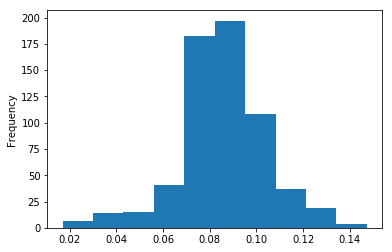

In [28]:
df['total_diabetes'].plot.hist()

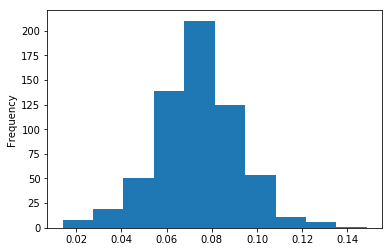

In [29]:
df['white_diabetes'].plot.hist()

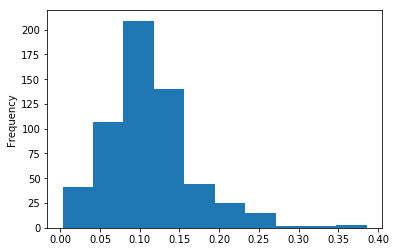

In [30]:
df['black_diabetes'].plot.hist()

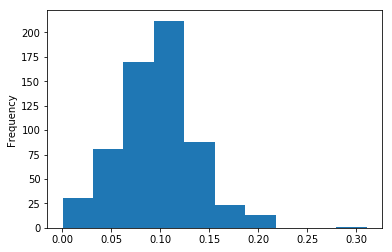

In [31]:
df['asian_diabetes'].plot.hist()

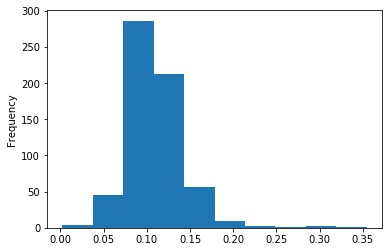

In [32]:
df['hispanic_diabetes'].plot.hist()

In [33]:
print("white pop:", sum(df['tractwhite'])/sum(df['pop']))
print("black pop:", sum(df['tractblack'])/sum(df['pop']))
print("asian pop:", sum(df['tractasian'])/sum(df['pop']))
print("hispanic pop:", sum(df['tracthispanic'])/sum(df['pop']))
print("other pop:", sum(df['tractother'])/sum(df['pop']))

white pop: 0.6401426931622101
black pop: 0.05111373227844809
asian pop: 0.10858061850287838
hispanic pop: 0.3202739109098175
other pop: 0.20016295605646342


In [34]:
df_pop_counts = df[['pop']].copy()
df_pop_counts['%whitehalf'] = [(x['whitehalfshare']*x['tractwhite'])/x['pop'] for i,x in df.iterrows()]
df_pop_counts['%blackhalf'] = [(x['blackhalfshare']*x['tractblack'])/x['pop'] for i,x in df.iterrows()]
df_pop_counts['%asianhalf'] = [(x['asianhalfshare']*x['tractasian'])/x['pop'] for i,x in df.iterrows()]
df_pop_counts['%hispanichalf'] = [(x['hispanichalfshare']*x['tracthispanic'])/x['pop'] for i,x in df.iterrows()]
df_pop_counts['%otherhalf'] = [(x['otherhalfshare']*x['tractother'])/x['pop'] for i,x in df.iterrows()]
df_pop_counts.head()


,pop,%whitehalf,%blackhalf,%asianhalf,%hispanichalf,%otherhalf
0,3029,0.862464,0.000074,0.000630,0.006226,0.001416
1,1801,0.309999,0.000117,0.000399,0.003796,0.000940
2,4208,0.340898,0.000367,0.000878,0.009628,0.003017
3,4732,0.090614,0.000085,0.000469,0.002853,0.000772
4,3669,0.073442,0.000278,0.000935,0.003835,0.001121


In [35]:
# start of Alia's part

#### race vs diabetes rates ####

In [36]:
def get_total_diabetes_rate_for_race(race):
    race_pop_col_name = 'tract' + race
    race_diabetes_rate_col_name = race + '_diabetes'
    
    # for each row, multiply pop * diabetes rate to get total, add to sum
    num_with_diabetes = df[race_pop_col_name] * df[race_diabetes_rate_col_name]
    total_race_with_diabetes_count = num_with_diabetes.sum()
    # use .sum() on the pop column to get total pop of the race
    total_race_count = df[race_pop_col_name].sum()
    # return calculated sum / .sum()
    return total_race_with_diabetes_count / total_race_count    

In [37]:
def make_bar_graph(x_labels, y_labels, title):
    # adapted from stack overflow post:
    # https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
    plt.figure(figsize=(12, 8))
    ax = pd.Series(y_labels).plot(kind='bar')
    ax.set_title(title)
    ax.set_xticklabels(x_labels)

    rects = ax.patches

    frequency_labels = [str(r) for r in y_labels]

    # add labels to bars
    for rect, label in zip(rects, frequency_labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + .1, label,
                ha='center', va='bottom')

    # remove the outline
    plt.box(False)

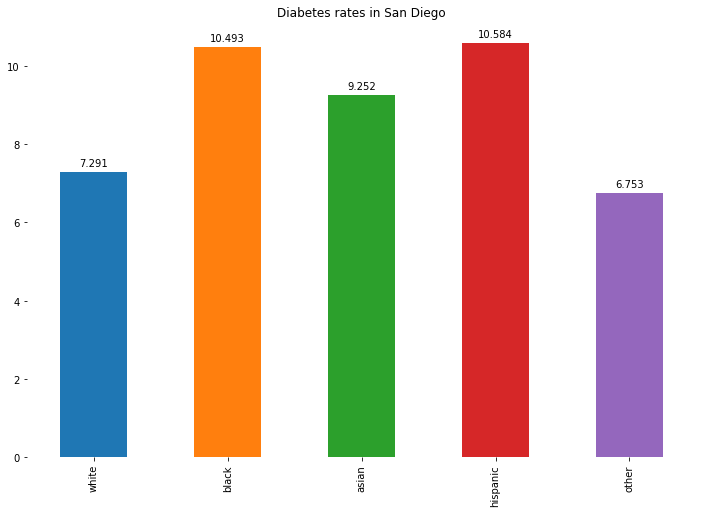

In [38]:
race_labels = ['white','black', 'asian', 'hispanic', 'other']
diabetes_rates = [float("{0:.3f}".format(get_total_diabetes_rate_for_race(r)*100)) for r in race_labels]

make_bar_graph(race_labels, diabetes_rates, 'Diabetes rates in San Diego')

    
# plt.bar(range(1,6), diabetes_rates, width=.5, tick_label=labels)

#### distance to nearest supermarket vs race ####

In [39]:
# race: {'white', 'black', 'hispanic', 'asian', 'other'}
# dist: {'half', '1'}
def get_share_more_than_dist_for_race(race, dist):
    race_pop_col_name = 'tract' + race
    race_dist_count_col_name = race + dist
    
    # use .sum() on the pop count of race + over "dist" to supermarket
    total_race_over_dist_count = df[race_dist_count_col_name].sum()
    # use .sum() on the pop column to get total pop of the race
    total_race_count = df[race_pop_col_name].sum()
    return total_race_over_dist_count / total_race_count 

[57.392, 47.834, 55.992, 42.633, 43.83]


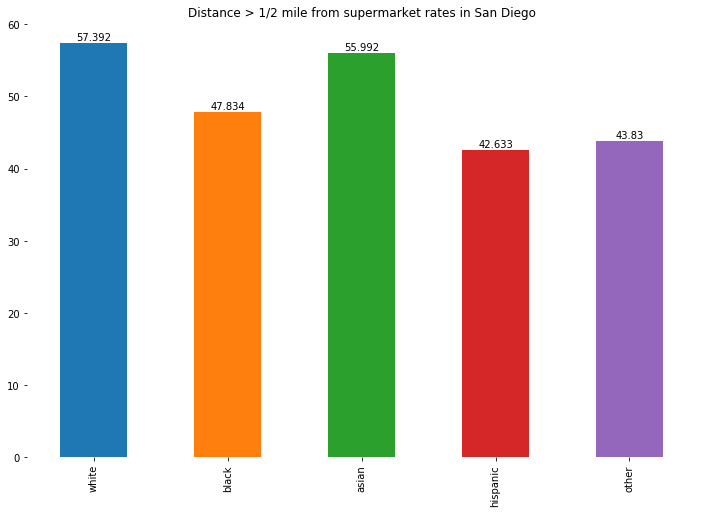

In [40]:
# Plot > .5 miles away vs race

race_labels = ['white','black', 'asian', 'hispanic', 'other']
over_dist_rates = [float("{0:.3f}".format(get_share_more_than_dist_for_race(r, 'half')*100)) for r in race_labels]

print(over_dist_rates)

make_bar_graph(race_labels, over_dist_rates, 'Distance > 1/2 mile from supermarket rates in San Diego');

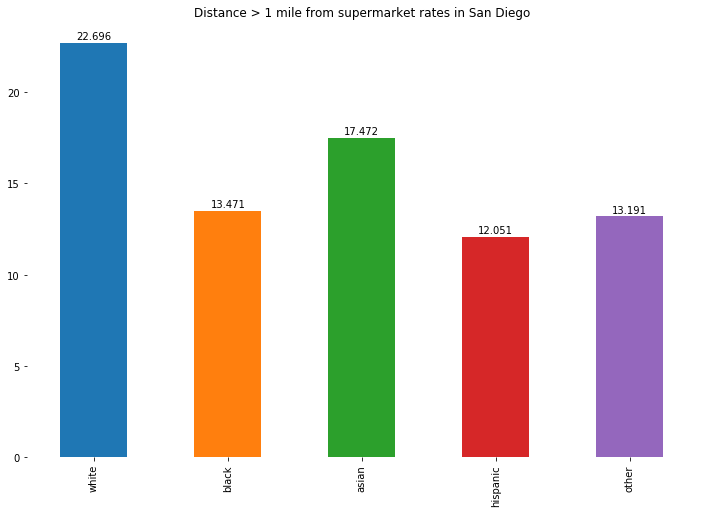

In [41]:
# Plot > 1 mile away vs race

race_labels = ['white','black', 'asian', 'hispanic', 'other']
over_dist_rates = [float("{0:.3f}".format(get_share_more_than_dist_for_race(r, '1')*100)) for r in race_labels]

make_bar_graph(race_labels, over_dist_rates, 'Distance > 1 mile from supermarket rates in San Diego');

In [42]:
def create_scatter_plus_bestfit(predictor_col, result_col, 
                                predictor_label, result_label):
    outcome, predictors = patsy.dmatrices(result_col + ' ~ ' + predictor_col, df)
    mod = sm.OLS(outcome, predictors)
    res = mod.fit()

    plt.scatter(df[predictor_col], df[result_col], label='Data')

    xs = np.arange(df[predictor_col].min(), df[predictor_col].max(), 0.01)
    ys = res.params[1] * xs + res.params[0]
    plt.plot(xs, ys, '--k', label='Model')

    print('y intercept:\t', "{0:.5f}".format(res.params[0]))
    print('slope:\t\t', "{0:.5f}".format(res.params[1]))

    plt.xlabel(predictor_label)
    plt.ylabel(result_label)
    plt.legend()

#### distance to supermarket vs diabetes rate ####

y intercept:	 0.08730
slope:		 -0.00000


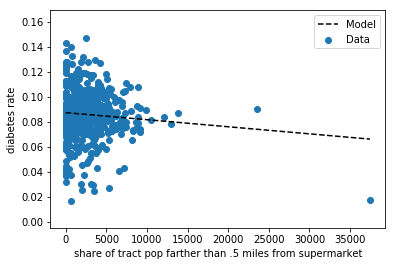

In [43]:
create_scatter_plus_bestfit('pophalf', 'total_diabetes', 
                            'share of tract pop farther than .5 miles from supermarket', 
                            'diabetes rate')

y intercept:	 0.08622
slope:		 -0.00000


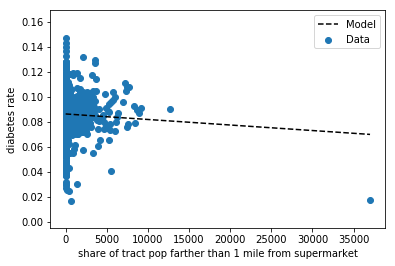

In [44]:
create_scatter_plus_bestfit('pop1', 'total_diabetes', 
                            'share of tract pop farther than 1 mile from supermarket', 
                            'diabetes rate')

(NOTE FOR WRITEUP: tried this with all races individually, got a slope of 0 for each one)

#### poverty rate vs diabetes rate ####
(NOTE FOR WRITE UP: there is clearly not a very strong correlation here lol)

y intercept:	 0.08468
slope:		 0.00745


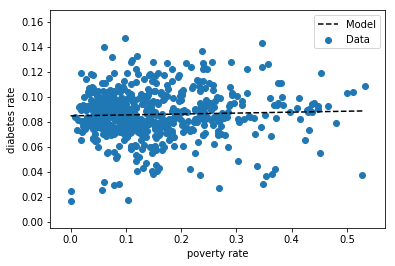

In [45]:
create_scatter_plus_bestfit('povertyrate', 'total_diabetes', 
                            'poverty rate', 'diabetes rate')

#### median family income vs diabetes rates ####
(NOTE FOR WRITE UP: there is clearly not a very strong correlation here either lol)

y intercept:	 0.08795
slope:		 -0.00000


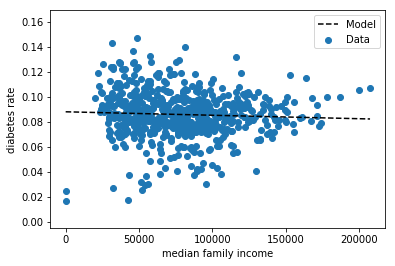

In [46]:
create_scatter_plus_bestfit('medianfamilyincome', 'total_diabetes', 
                            'median family income', 'diabetes rate');

### Data Analysis

talk about our results here!!

### Ethics and Privacy

This data has been obtained from the San Diego Regional Data Library which allows people such as governments and journalists have usable data for their operations. The datasets are open to use to “inform and influence grantors, decision makers, and the public” and our project functions to inform the public about the relationship between diabetes and supermarket accessibility. The estimated diabetes rates are calculated from the California Health Interview Survey (CHIS) microdata and is provided from the UCLA Center for Health Policy Research. There are terms and restrictions for creation of the data. Bound by promises made to respondents, CHIS assures that no personal information is released in a way that an individual may be identified without consent. The terms of use that we must comply with includes the California Information Practice Act section 1798.24 which states that the data collected by CHIS may only be released for statistical research and reporting purposes.The  supermarket accessibility data is based on the information from the Food Access Research Atlas which provides food access data for populations within census tracts. This data was gathered from the census and is public information.


Because the data was collected from surveys, there is room for biases in the data. It is possible that individuals may not report the correct information. For example, people may incorrectly report income if they are embarrassed about their income level. Another potential bias could be that the risk of diabetes for minority groups is underestimated due to a smaller sample size. Our datasets are very generalized, so in our case there are not very many privacy concerns. Of course if there are very few people of a certain demographic within a GeoID, then we run into a deanonymization issue, especially combining datasets. This likelihood however should be low since we are mostly dealing with rates rather than counts. Our analysis on the other hand could show some interesting conclusions that could have more severe impact. Finding that either race or food access affects diabetes risks more than the other, could negatively impact health insurance premiums for the riskier demographics. If we published findings, then it could affect the choices of potential employers as well, thinking about health coverage of employees or potentially limited future work potential for riskier groups. If we run into these issues we would make sure to clarify in our report that any correlations we find do not imply causation, and that many genetic and environmental factors contribute to a person’s risk for diabetes. 

### Conclusions and discussions

If our hypothesis were to be confirmed, this would mean that “populations with less accessibility to supermarkets would be at higher risk for diabetes development due to the decreased availability of fresh, healthy food options”.  Confirmation of this hypothesis and prediction could have a major impact on the future of urban planning.  With an understanding that availability of supermarkets, and consequently fresh produce, can greatly impact the overall health of the people living in these areas, urban planners can take greater care to incorporate more accessible markets into the planning of future communities. This may impact not only in the field of urban planning, but it could also lead to legislative changes like increased subsidies for local farms.  Farmers’ markets are excellent places for locals to have access to fresh and organic produce, but it is often very expensive.  Governmental subsidies afforded to these farmers may help reduce the price of the product, while simultaneously supporting local businesses.  Along the same lines, a greater push for access to fresh produce could lead to the creation of more community sustained gardening or farming initiatives.  These types of projects are especially impactful in low-income areas due to their self-sustaining nature.

If our methods don't work or if our hypothesis are wrong we could look into expanding the size of our data set to include Southern California, or even the entire state of California instead of restricting it to just San Diego county. An increase in the number of data points could reveal trends that were not previously present in the smaller dataset. If our hypothesis turns out to be incorrect, we will have to go back and take another look at our variables, then further modify our hypothesis.

A potential confounds in the data that could influence our interpretations would be genetics. Diabetes, to some extent, is hereditary. An individual inherits a predisposition to the disease and something in the environment triggers it. The data does not take into account whether the population in each tract includes people in the same families which may change how the data is interpreted because genetics may be the underlying predictor for diabetes rather than supermarket accessibility. Additionally, the data does not take into account the differences between type 1 diabetes and type 2 diabetes. Type 1 is an autoimmune condition and is not typically associated with poor diet and food intake unlike type 2 diabetes. Therefore, supermarket accessibility would not necessarily contribute to the risk of type 1 diabetes. We may have interpreted the need for supermarket accessibility differently if the data addressed type 1 and type 2 diabetes in the population separately. Another potential pitfall of our data is that the datasets are collected a few years apart. The food access dataset is based on 2010 census data, where as the diabetes dataset is based on data from 2015-2017. If the population of San Diego dramatically changed or shifted around in that time period, it could confound our results.